In [19]:
from bs4 import BeautifulSoup
import requests
import json

In [20]:
def create_header(referer):
    return {
        "User-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36",
        "referer": referer,
    }

In [21]:
#https://www.melon.com/chart/#params%5Bidx%5D=1
idx = [
    (1, 50),
    (51, 100)
]

In [22]:
def create_url(idx):
    return "https://www.melon.com/chart/#params%5Bidx%5D={}".format(idx)

In [23]:
def get_links(referer, ids):
    url = "https://www.melon.com/commonlike/getSongLike.json?contsIds="
    str_ids = ','.join([str(i) for i in ids])
    url = url + str_ids
    
    r = requests.get(url, headers=create_header(referer))
    #{"contsLike":[{"CONTSID":31151836,"LIKEYN":"N","SUMMCNT":169670},{"CONTSID":31230093,"LIKEYN":"N","SUMMCNT":84766},{"CONTSID":31175119,"LIKEYN":"N","SUMMCNT":105965},{"CONTSID":31151836,"LIKEYN":"N","SUMMCNT":169670},{"CONTSID":31230093,"LIKEYN":"N","SUMMCNT":84766},{"CONTSID":31175119,"LIKEYN":"N","SUMMCNT":105965}],"httpDomain":"http://www.melon.com","httpsDomain":"https://www.melon.com","staticDomain":"https://static.melon.co.kr"}
    #
    #
    likes = json.loads(r.content.decode('utf-8'))
    return likes['contsLike']

In [24]:
def get_melon_list(html, tid, order_init):
    root = BeautifulSoup(html,"html.parser")
    #<tr class="lst50"
    orders = {}
    order = order_init
    tag_class = "lst{}".format(tid)
    songs = root.find_all("tr", class_=tag_class)
    song_ids = []
    for song in songs:
        #<div class="ellipsis rank01">
        songid = int(song["data-song-no"])
        name = song.find("div", class_="ellipsis rank01").get_text().strip()
        singer = song.find("div", class_="ellipsis rank02").get_text().strip()
        album = song.find("div", class_="ellipsis rank03").get_text().strip()
        orders[songid] = {'id': songid, 'name': name, 'singer': singer, 'album': album, 'order': order}
        song_ids.append(songid)
        order += 1
        
    likes = get_links('https://www.melon.com/chart/index.htm', song_ids)
    
    for like in likes:
        sid = like['CONTSID']
        orders[sid]['likes'] = like['SUMMCNT']
        
    return orders

In [25]:
items = []
for i in idx:
    url = create_url(i[0])
    r = requests.get(url, headers=create_header("https://www.melon.com/chart/index.htm"))
    l = get_melon_list(r.content, i[1], i[0])
    for item in l:
        items.append(l[item])

In [32]:
items = sorted(items, key=lambda item: item['order'])

for item in items:
    print(item['name'], item['likes'], item['order'])

Way Back Home 171612 1
Power Up 87670 2
Dance The Night Away 106773 3
뚜두뚜두 (DDU-DU DDU-DU) 175778 4
SoulMate (Feat. 아이유) 90406 5
너나 해 (Egotistic) 72543 6
1도 없어 74460 7
모든 날, 모든 순간 (Every day, Every Moment) 131076 8
여행 177572 9
Forever Young 104640 10
FAKE LOVE 232559 11
동화 65163 12
죽겠다 (KILLING ME) 42503 13
지나오다 164020 14
Love U 46571 15
너 없인 안 된다 118176 16
셋 셀테니 (1, 2, 3!) 48107 17
사랑을 했다 (LOVE SCENARIO) 258528 18
BAAM 33441 19
여름여름해 (Sunny Summer) 37871 20
전하지 못한 진심 (Feat. Steve Aoki) 151676 21
주지마 146094 22
DNA 311314 23
봄날 342040 24
열애중 57697 25
어쩌나 54848 26
밤 (Time for the moon night) 118408 27
What is Love? 117378 28
Anpanman 122601 29
켜줘 (Light) 108489 30
에너제틱 (Energetic) 266462 31
HandClap 146638 32
빙글뱅글 (Bingle Bangle) 69031 33
별이 빛나는 밤 140858 34
You 132732 35
뿜뿜 129848 36
캥거루 (Kangaroo) (Prod. ZICO) 98695 37
Havana (Feat. Young Thug) 154969 38
빨간 맛 (Red Flavor) 197976 39
Airplane pt.2 113521 40
BOOMERANG (부메랑) 122437 41
Roller Coaster 134148 42
Magic Shop 116820 43
그날처럼 20177

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas.plotting._converter as pandacnv

In [34]:
dfItem = pd.DataFrame.from_records(items)

In [35]:
x = dfItem["order"]
y = dfItem["likes"]

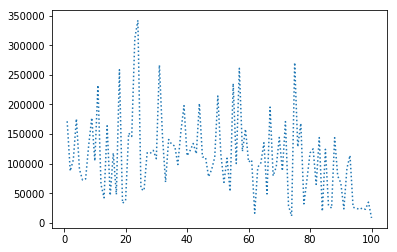

In [36]:
plt.plot(x,y, linestyle=':')

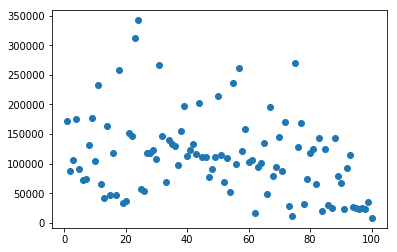

In [37]:
plt.scatter(x, y)